### Support Vector Machines (think of a wide street separating vectors)

large margin classification, adding more training instances will not affect the bounary decisions. The supported vectors are on the edge of the street

hard margin all data is easily linearly separble, a more flexable solution is to use soft margin classification

In [3]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [4]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [5]:
svm_clf.decision_function(X_new) # distance between each instance

array([ 0.66163411, -0.22036063])

### If its hard to linearly fit data because its not separable use a PolynomialFeatures transformer

This will create more of a curved line to separate

In [16]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

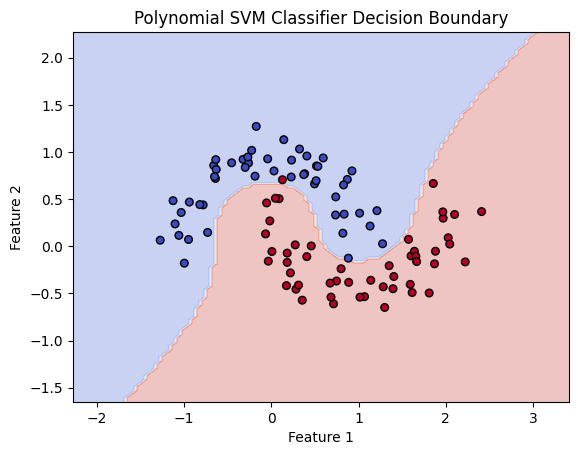

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid for plotting the decision boundary
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)

# Get predictions for each point in the grid
Z = polynomial_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()])
Z = Z.reshape(x0.shape)

# Plot the decision boundary with background colors
plt.contourf(x0, x1, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', marker='o')

# Add labels and title
plt.title('Polynomial SVM Classifier Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()